In [1]:
#################################################################

# the amount of money risked
amt = 1000

# minimum aceptable final amount
amt1 = 800

# The probability of a succesful prediction
p = 0.72

#################################################################

import pandas as pd
import numpy as np

pred_df = pd.read_csv('pred_df.csv')
pred_df

from IPython.display import display, HTML

# Define and HTML function to centre images
HTML_cmds = HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

pred_df

,date,R_fighter,R_ev,B_fighter,B_ev,y_hat,projected winner
0,2021-12-04,Rob Font,71.428571,Jose Aldo,120.000000,1,Rob Font
1,2021-12-04,Brad Riddell,105.000000,Rafael Fiziev,80.000000,1,Brad Riddell
2,2021-12-04,Jimmy Crute,57.142857,Jamahal Hill,150.000000,1,Jimmy Crute
3,2021-12-04,Clay Guida,160.000000,Leonardo Santos,52.631579,0,Leonardo Santos
4,2021-12-04,Brendan Allen,27.777778,Chris Curtis,280.000000,0,Chris Curtis
5,2021-12-04,Alex Morono,43.478261,Mickey Gall,190.000000,1,Alex Morono
6,2021-12-04,Maki Pitolo,135.000000,Dusko Todorovic,62.500000,1,Maki Pitolo
7,2021-12-04,Manel Kape,37.037037,Zhalgas Zhumagulov,220.000000,1,Manel Kape
8,2021-12-04,Bryan Barberena,76.923077,Darian Weeks,110.000000,1,Bryan Barberena
9,2021-12-04,Jake Matthews,57.142857,Jeremiah Wells,150.000000,0,Jeremiah Wells


In [2]:
b_ev = pred_df['B_ev']
r_ev = pred_df['R_ev']

card_ev =[]

i = 0
for yhat in pred_df['y_hat']:
    if yhat == 0:
        temp_ret = b_ev[i]
        temp_ret += 100
        card_ev.append(temp_ret)
    else:
        temp_ret = r_ev[i]
        temp_ret += 100
        card_ev.append(temp_ret)
    i += 1

import itertools

# number of repeats for itertools
reps = len(pred_df)

# to scale the bet amounts/ winnings 
# assumes money is bet equally across the card
ret_scale = 10/reps

# list of all combinations
combs = list(itertools.product([0, 1], repeat=reps))

# number of iterations to loop through
iters = len(combs)

# for binomial prob. calculations
q = 1-p
n = reps

probs = []
outcomes = []

for comb in combs:
    r = np.sum(comb)
    prob = (p**r)*(q**(n-r))
    probs.append(prob)
    temp_outcome = np.array(comb)*card_ev*ret_scale
    outcomes.append(temp_outcome)

tot_ret = []

for array in outcomes:
    x = np.sum(array)
    tot_ret.append(x)
    
x_df = pd.DataFrame()
x_df['outcome'] = tot_ret
x_df['probability'] = probs

#p_outcomes = []

#for proba in x_df['probability'].unique():
    #temp_mean = np.mean(x_df[x_df['probability'] == proba]['outcome'])
    #p_outcomes.append(temp_mean)
    
#dist_df = pd.DataFrame()
#dist_df['placeholder'] = p_outcomes

# probability of non-negative return
pos_prob = round(np.sum(x_df[x_df['outcome']>= amt]['probability']),4)

print('')
title = '\n Probability of a non-negative return on this fight card: {0} \n'.format(pos_prob)
HTML('<font size="+2">{}</font>'.format(title))

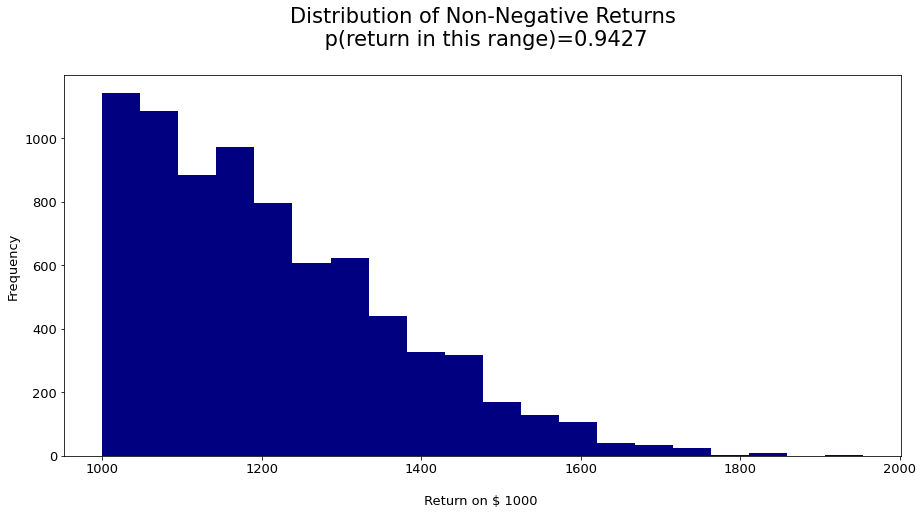

In [3]:
# font sizes
f1 = 21
f2 = 13

ax = x_df[x_df['outcome']> amt]['outcome'].plot.hist(bins=20, 
                                                     colormap='jet',
                                                     fontsize=f2,
                                                     figsize=(15,7))
                                                       
ax.set_title('Distribution of Non-Negative Returns\n p(return in this range)={0}\n'.format(pos_prob),fontsize=f1)
ax.set_xlabel("\n Return on $ {0}  ".format(amt), fontsize=f2)
ax.set_ylabel('Frequency', fontsize=f2)

HTML_cmds

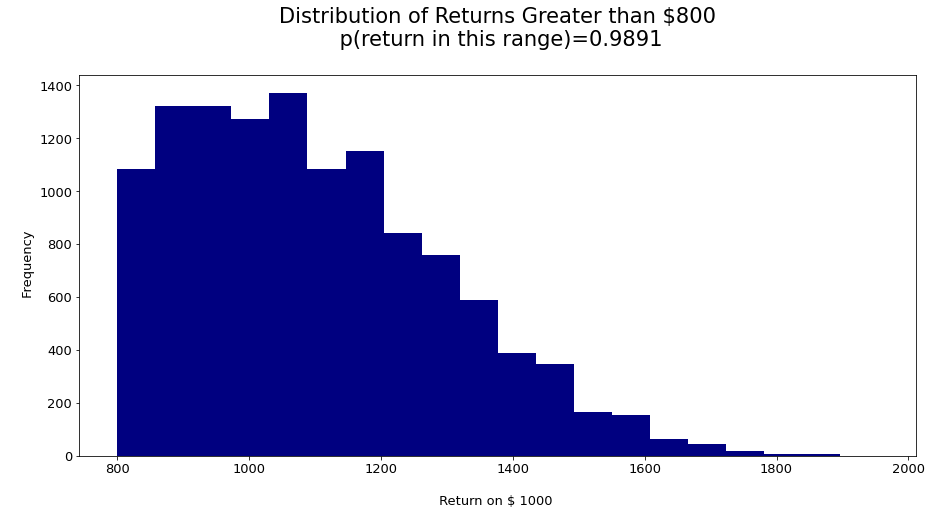

In [4]:
ok_prob = round(np.sum(x_df[x_df['outcome']>= amt1]['probability']),4)

ax1 = x_df[x_df['outcome']>=amt1]['outcome'].plot.hist(bins=20, 
                                                     colormap='jet',
                                                     fontsize=f2,
                                                    figsize=(15,7))

ax1.set_title('Distribution of Returns Greater than $800\n p(return in this range)={0}\n'.format(ok_prob),fontsize=f1)
ax1.set_xlabel("\n Return on $ {0}  ".format(amt), fontsize=f2)
ax1.set_ylabel('\n Frequency', fontsize=f2)

HTML_cmds